In [41]:
def dy_dx(x):
  return 2*x

In [42]:
dy_dx(3)

6

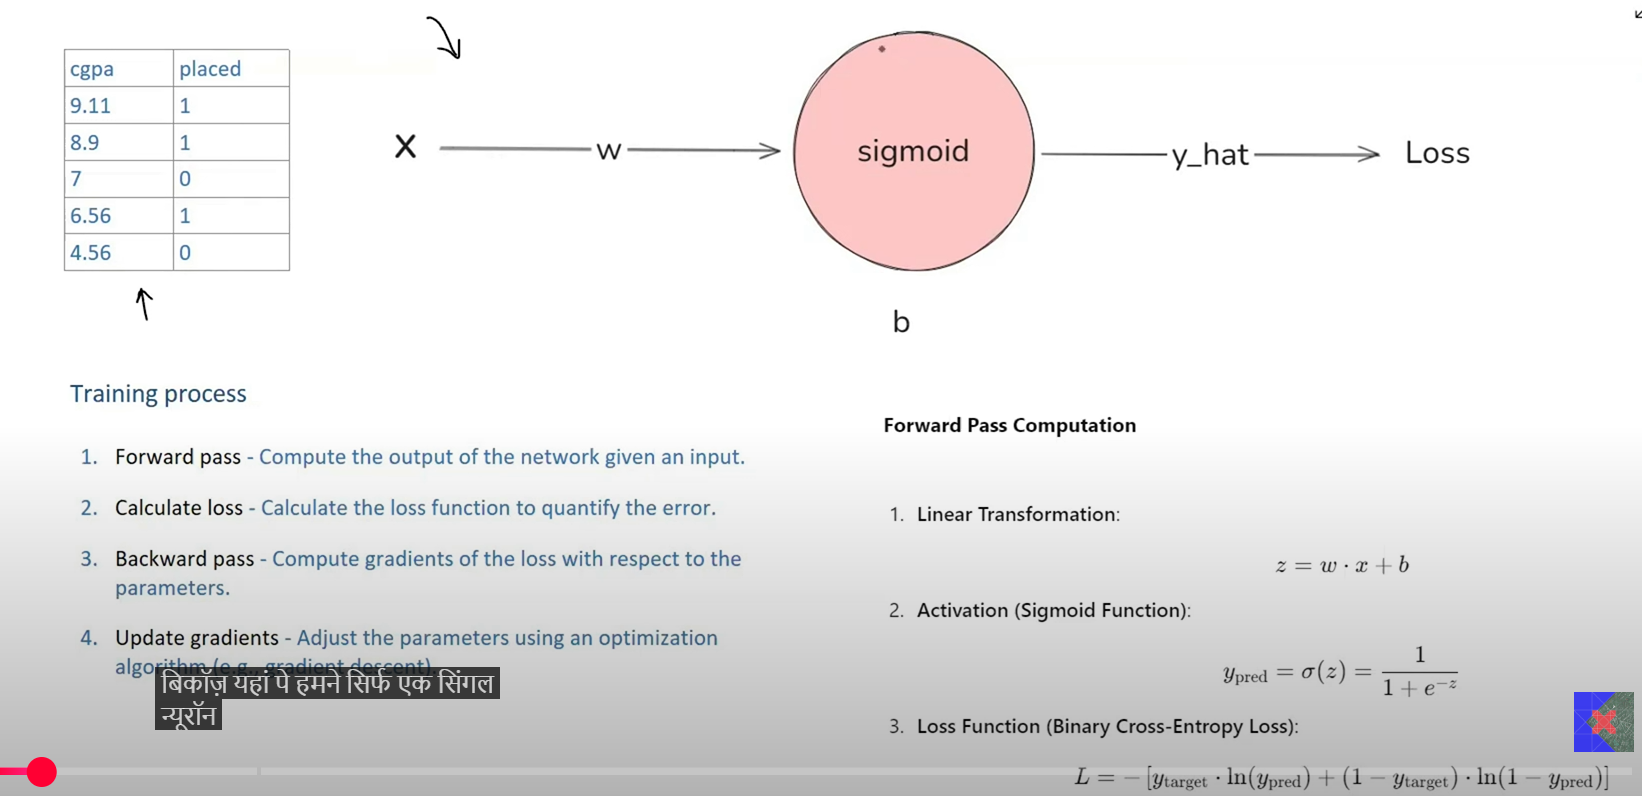

In [43]:
import torch

In [44]:
x = torch.tensor(3.0, requires_grad=True)

In [45]:
y = x**2

In [46]:
x

tensor(3., requires_grad=True)

In [47]:
y

tensor(9., grad_fn=<PowBackward0>)

In [48]:
# dy/dx
y.backward()

In [49]:
x.grad

tensor(6.)

In [51]:
import math

def dz_dx(x):
    return 2 * x * math.cos(x**2)

In [54]:
dz_dx(5)

9.912028118634735

In [55]:
x = torch.tensor(4.0, requires_grad = True) ## requires_grad understand differentiation

In [56]:
y = x**2


In [57]:
z = torch.sin(y)

In [58]:
x

tensor(4., requires_grad=True)

In [59]:
y

tensor(16., grad_fn=<PowBackward0>)

In [60]:
z

tensor(-0.2879, grad_fn=<SinBackward0>)

In [61]:
z.backward()

In [62]:
x.grad

tensor(-7.6613)

In [63]:
y.grad

<ipython-input-63-10b3a7061f6d>:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  y.grad


In [64]:
import torch

# Inputs
x = torch.tensor(6.7)  # Input feature
y = torch.tensor(0.0)  # True label (binary)

w = torch.tensor(1.0)  # Weight
b = torch.tensor(0.0)  # Bias

In [65]:
# Binary Cross-Entropy loss for Scalar
def binary_cross_entropy_loss(prediction, target):
  epsilon = 1e-8  # To prevent log(0)
  prediction =  torch.clamp(prediction,epsilon, 1-epsilon)
  return - (target * torch.log(prediction)+ (1-target)* torch.log(1-prediction))

In [66]:
## Forward Pass
z = w*x+b    #Weighted Sum (Linear Part)
y_pred = torch.sigmoid(z)  # Predicted Probabaility

#Compute Binary cross_entropy Loss
loss = binary_cross_entropy_loss(y_pred,y)



In [67]:
loss


tensor(6.7012)

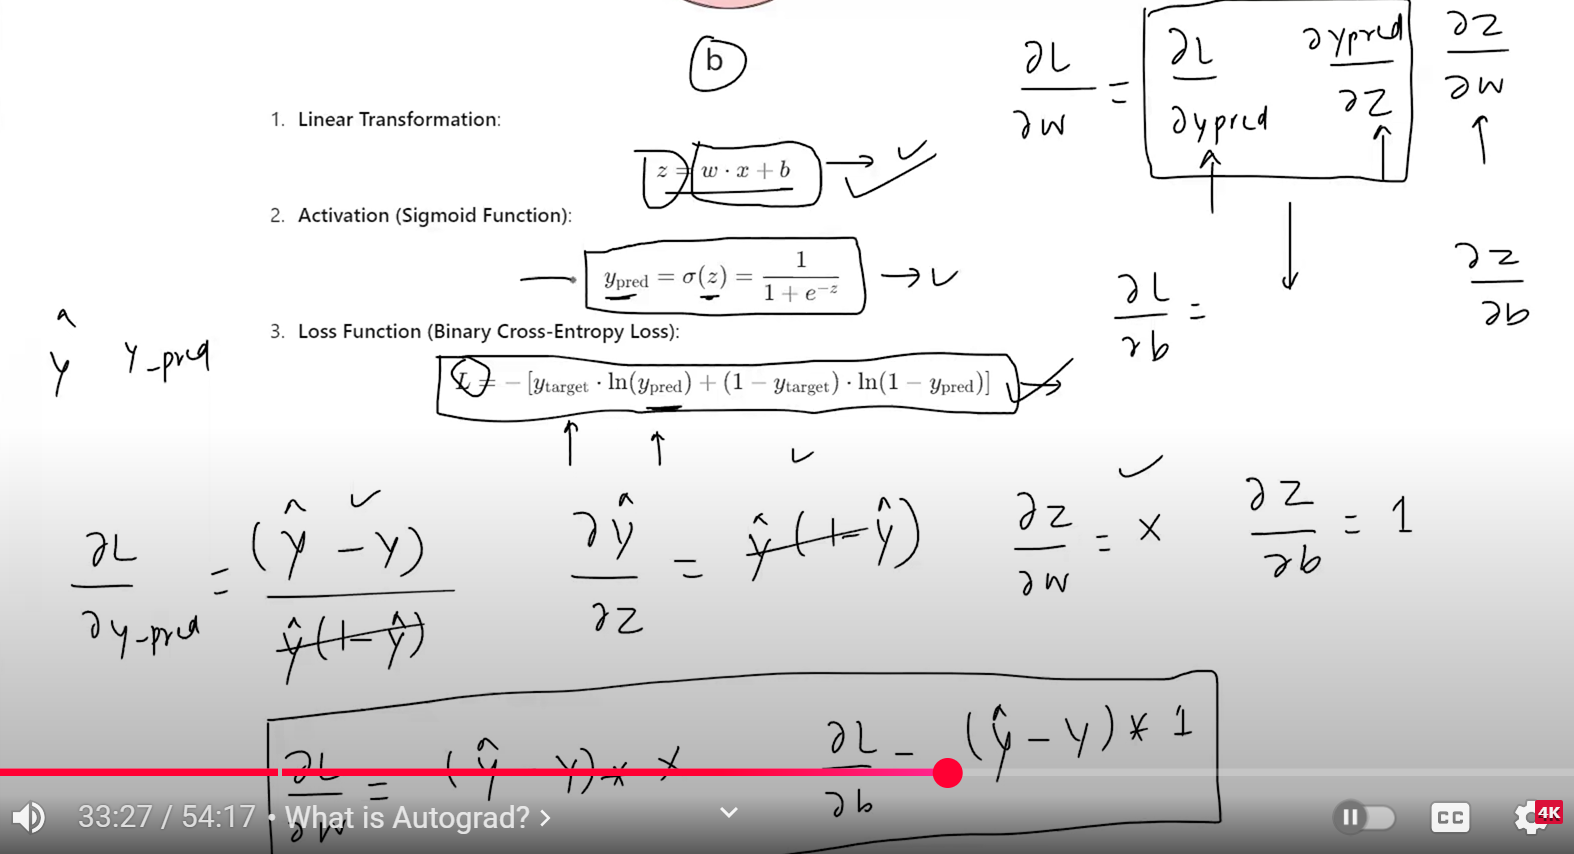

In [68]:
# Derivatives:
# 1. dL/d(y_pred): Loss with respect to the prediction (y_pred)
dloss_dy_pred = (y_pred - y)/(y_pred*(1-y_pred))

# 2. dy_pred/dz: Prediction (y_pred) with respect to z (sigmoid derivative)
dy_pred_dz = y_pred * (1 - y_pred)

# 3. dz/dw and dz/db: z with respect to w and b
dz_dw = x  # dz/dw = x
dz_db = 1  # dz/db = 1 (bias contributes directly to z)

dL_dw = dloss_dy_pred * dy_pred_dz * dz_dw
dL_db = dloss_dy_pred * dy_pred_dz * dz_db

In [69]:
print(f"Manual Gradient of loss w.r.t weight (dw): {dL_dw}")
print(f"Manual Gradient of loss w.r.t bias (db): {dL_db}")

Manual Gradient of loss w.r.t weight (dw): 6.691762447357178
Manual Gradient of loss w.r.t bias (db): 0.998770534992218


In [70]:
x = torch.tensor(6.7)
y = torch.tensor(0.0)

In [71]:
w = torch.tensor(1.0, requires_grad =True)
b = torch.tensor (0.0, requires_grad=True)

In [72]:
w

tensor(1., requires_grad=True)

In [73]:
b

tensor(0., requires_grad=True)

In [74]:
z = w*x +b

In [75]:
z

tensor(6.7000, grad_fn=<AddBackward0>)

In [77]:
y_pred = torch.sigmoid(z)
y_pred

tensor(0.9988, grad_fn=<SigmoidBackward0>)

In [78]:
loss = binary_cross_entropy_loss(y_pred, y)
loss

tensor(6.7012, grad_fn=<NegBackward0>)

In [79]:
loss.backward()

In [80]:
print(w.grad)
print(b.grad)

tensor(6.6918)
tensor(0.9988)


In [81]:
## Vector Form
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

In [82]:
x

tensor([1., 2., 3.], requires_grad=True)

In [84]:
y = (x**2).mean()
y

tensor(4.6667, grad_fn=<MeanBackward0>)

In [85]:
y.backward()

In [86]:
x.grad

tensor([0.6667, 1.3333, 2.0000])

## # clearing grad

In [87]:
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [88]:
y = x ** 2
y

tensor(4., grad_fn=<PowBackward0>)

In [89]:
y.backward()

In [90]:
x.grad

tensor(4.)

In [91]:
x.grad.zero_()

tensor(0.)

In [92]:
# disable gradient tracking
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [93]:
y = x ** 2
y

tensor(4., grad_fn=<PowBackward0>)

In [94]:
y.backward()

In [95]:
x.grad

tensor(4.)

In [96]:
# option 1 - requires_grad_(False)

In [97]:
x.requires_grad_(False)

tensor(2.)

In [98]:
x

tensor(2.)

In [99]:
y = x**2

In [100]:
y

tensor(4.)

In [101]:
y.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn